<a href="https://colab.research.google.com/github/anahimaciel/Networks-in-cities/blob/main/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prep

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import geopy.distance

import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
#read df
city="Caucaia"
residence_df = pd.read_csv("/content/drive/MyDrive/Networks in cities/Dados/"+city+"/home_locations.txt")
residence_df=residence_df.drop(residence_df.columns[0],axis=1)
residence_df

user_from  antenna      LAT      LONG
0       00008112363605FFC0A6971A16D98128     3823 -3.76556 -38.65028
1       0000851C574768CA2BB1156851A3171C     3872 -3.67389 -38.67167
2       0000F8778334D32580C06AF4C176E162     3191 -3.73389 -38.65722
3       00018C8646F523A687A8387E76A47295     1601 -3.74214 -38.61220
4       00018D858C1D7803B20F7B0DF28E9211     1102 -3.76810 -38.61820
...                                  ...      ...      ...       ...
309997  FFFF6761884073022FB5DFE1B6F54DE3      892 -3.73960 -38.65510
309998  FFFF73B828960B2C39C560BBA1B93B4C     2422 -3.77722 -38.62194
309999  FFFFBBF11C6DCD793A020564A9CF6FFE      893 -3.73960 -38.65510
310000  FFFFC5D625F2527647BD4D859AB95B37     3191 -3.73389 -38.65722
310001  FFFFDD9F1B5D2FA8F59163E0ED00B169     1103 -3.76810 -38.61820

[310002 rows x 4 columns]

In [5]:
#calculate number of people living in certain area
loc_pop = residence_df.groupby('antenna').size().to_frame(name="loc_pop")
residence_df=pd.merge(residence_df,loc_pop,on="antenna",how="left")

# Home Location

In [6]:
#create interactive map of residences
color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(residence_df,
                        lat="LAT",
                        lon="LONG",
                        color="loc_pop",
                        color_continuous_scale=color_scale,
                        size="loc_pop",
                        zoom=8,
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [17]:
coord=residence_df.agg({'LAT':['max','min'],'LONG':['max','min']})
coord


LAT      LONG
max -3.60897 -38.60309
min -3.80000 -38.87583

<ipython-input-25-bcac8a784fdc>:7: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



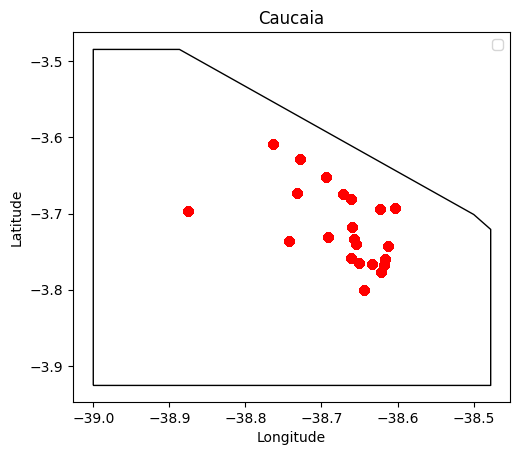

In [25]:
#create geodataframe
gdf = gpd.GeoDataFrame(
    residence_df, geometry=gpd.points_from_xy(residence_df.LONG, residence_df.LAT), crs="EPSG:4326"
)

#world map
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

#restricting world to city
ax = world.clip([coord._get_value('min','LONG')-0.125, coord._get_value('min','LAT')-0.125, coord._get_value('max','LONG')+0.125, coord._get_value('max','LAT')+0.125]).plot(color="white", edgecolor="black")

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'{city}')
plt.legend()

#plot geodataframe with matplotlib
gdf.plot(ax=ax, color="red")

plt.show()